# Chapter 4 - Building Good Training Datasets – Data Preprocessing

## Dealing with missing data



### Identifying missing values in tabular data

In [31]:
## Vamos criar um dataset contendo
## valores nulos.

import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''


df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [32]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [33]:
## Acessar array do dataframe
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Eliminating training examples or features with missing values


In [34]:
## Eliminar linhas com 
## dados faltantes.

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [35]:
## Eliminar colunas com 
## dados faltantes.

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [36]:
## Deleta linha apenas se
## todos os valores da linha forem
## nulos.

csv_data = \
'''A,B,C,D
,,,
5.0,,,8.0
10.0,,12.0,'''


df1 = pd.read_csv(StringIO(csv_data))
df1


df1.dropna(how='all')

,A,B,C,D
1,5.0,NaN,NaN,8.0
2,10.0,NaN,12.0,NaN


In [37]:
## Elimina as linhas onde
## não há ao menos quatro elementos.

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [38]:
## Apaga a linha, em caso
## de haver valores faltantes
## na coluna C.

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values

In [39]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [40]:
## Reproduzir o resultado na coluna
## anterior, usando pandas.

df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Categorical data encoding with pandas

In [41]:
## Dataset com dados nominais (color), 
## ordinais (size) e numéricos (price),
## classlabel seria o target.

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Mapping ordinal features


In [42]:
## Mapear as categorias
## para condificarr.

size_mapping = {'M':1, 
                'L':2, 
                'XL': 3}


df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [43]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

In [44]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [45]:
## to convert class labels from strings to integers
# df['classlabel'] = df['classlabel'].map(class_mapping)
# df

In [46]:
## Usar sklearn para o
## mesmo processo.

from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [47]:
## Reverter o processo
y = class_le.inverse_transform(y)
y

array(['class2', 'class1', 'class2'], dtype=object)

## Performing one-hot encoding on nominal features

In [48]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [49]:
## Transformar múltiplas colunas

from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price', 'classlabel']].values

c_transform = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])

c_transform.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [50]:
pd.get_dummies(df[['size', 'color', 'price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,False,True,False
1,2,13.5,False,False,True
2,3,15.3,True,False,False


In [51]:
pd.get_dummies(df[['size', 'color', 'price']], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,True,False
1,2,13.5,False,True
2,3,15.3,False,False


In [52]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,0,0
2,blue,15.3,class2,0,0


## Partitioning a dataset into a seperate training and test set


In [53]:
## Carregar dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [54]:
df_wine.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [55]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
## Spint data in train and test
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)


In [57]:
## normalize data
from sklearn.preprocessing import MinMaxScaler


mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

## Sequential feature selection algorithms


In [58]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

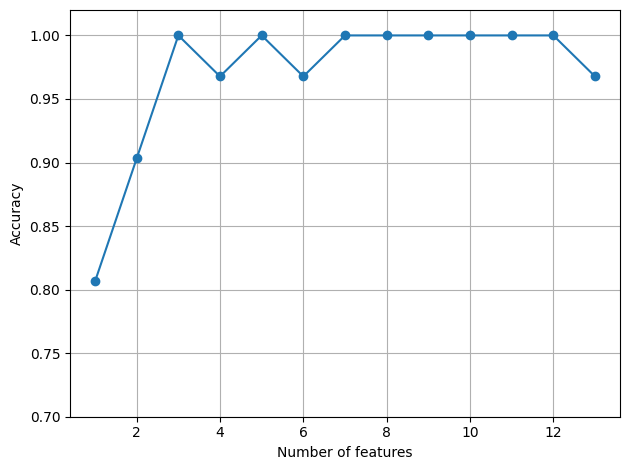

In [59]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_norm, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

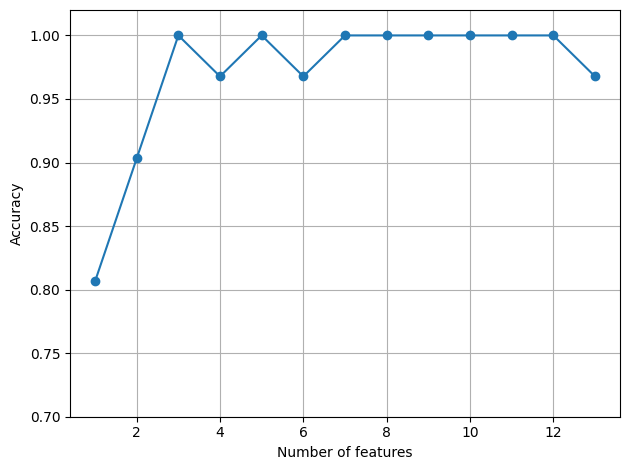

In [61]:
>>> import matplotlib.pyplot as plt
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier(n_neighbors=5)
>>> sbs = SBS(knn, k_features=1)
>>> sbs.fit(X_train_norm, y_train)
>>> k_feat = [len(k) for k in sbs.subsets_]
>>> plt.plot(k_feat, sbs.scores_, marker='o')
>>> plt.ylim([0.7, 1.02])
>>> plt.ylabel('Accuracy')
>>> plt.xlabel('Number of features')
>>> plt.grid()
>>> plt.tight_layout()
>>> plt.show()